# Abstract

In this notebook I will be training a Convolutional Neural Network model for character recognition on a dataset consisting of Typeface-based digits from Kaggle. The dataset consists of 29900 images representing digits between 0 to 9 and can be found at the below link:

https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist



In [1]:
pip install keras==2.2.5

In [2]:
pip install tensorflow==1.14.0

In [3]:
pip install numpy==1.19.1

In [4]:
#Importing libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2
from keras.utils import np_utils
from keras import layers
from keras import models

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/MyDrive/data/TMNIST_Data.csv'

In [7]:
#Reading csv into dataframe
df = pd.read_csv(path)

In [8]:
df.shape

(29900, 786)

In [9]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.describe()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,...,29900.000000,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003445,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493058,0.005783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Train test split
X = df.drop(columns= {'names', 'labels'}, axis = 1)
y =  df[['labels']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

While training the model, the images have to be in 28x28 format which means there should not be any depth to the image. Hence, we reshape the images in the dataset.

In [12]:
X_train = X_train.values.reshape(X_train.shape[0], 28, 28)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28)
y_train = y_train.values.reshape((-1,))
y_test = y_test.values.reshape((-1,))

In [13]:
#Validating the reshaped dataset
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
print(y_test.shape[0])

(23920, 28, 28)
(5980, 28, 28)
23920
5980


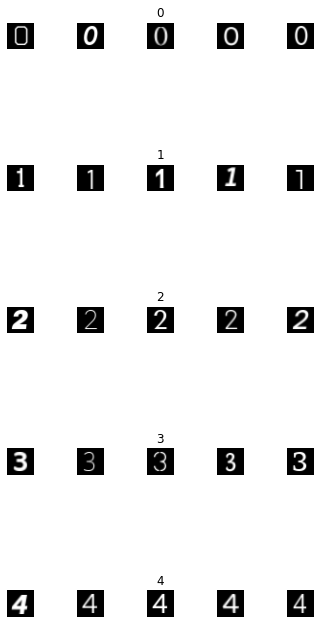

In [15]:
#Plotting images for 5 digits as greyscale
import random

num_of_samples = []

cols = 5
num_of_classes = 5

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray')) 
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

# Normalizing the data

As we have multi-class labels (0-9), we will one-hot encode the labels in both train and test set using the to_categorical() function.

In [16]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 

As Neural Networks require normalized data, we will be converting the train and test sets from unsigned integers to floating point numbers and then divide by 255 in order to normalize the data to the range of 0-1.

In [17]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

In [18]:
X_train = X_train.reshape((23920, 28, 28, 1))
X_test = X_test.reshape((5980, 28, 28, 1))

In [19]:
X_train = X_train / 255
X_test = X_test / 255

# Building the model

In this notebook, I have used the Keras API for building a simple neural network using a sequential model. The CNN consists of multiple layers: 
1. Convolutional layer which apply filters and kernels to the data to create a feature map that summarizes the presence of features in the data.
2. Activation Layer which uses rectifier function - Rectified Linear Unit or Relu to introduce non-linearity in the CNN. 
3. Pooling layer for downsampling feature detection in feature maps.
4. Fully connected layer which transforms the entire pooled feature map matrix into a single column and feeds it to a regular fully-connected neural network for image classification purposes.

In this model I have used 3 Convolutional layers with 32 and 64 filters and kernel of size 3x3 and L2 regularization with a hyperparameter of 0.0005.
I have added a dropout of 20% to reduce overfitting on training data by disregarding some of the neurons. I have 2 dense layers in the CNN of size 256 and 10 in the final layer (as we have 10 output classes).




In [20]:
#Building the CNN model
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),kernel_regularizer=l2(0.0005)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(units=10, activation='softmax'))
model.summary()        






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         


I have used adam optimizer for compiling the model with crossentropy as the loss function and accuracy will be used to evaluate the model performance.

I have used 25% for the validation split and 10 epochs with batch size of 100.

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split = 0.25, epochs=10, batch_size=100)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 17940 samples, validate on 5980 samples
Epoch 1/10
17940/17940 [==============================] - 33s 2ms/step - loss: 0.3429 - acc: 0.9026 - val_loss: 0.1335 - val_acc: 0.9600
Epoch 2/10
17940/17940 [==============================] - 19s 1ms/step - loss: 0.0833 - acc: 0.9765 - val_loss: 0.0759 - val_acc: 0.9768
Epoch 3/10
17940/17940 [==============================] - 19s 1ms/step - loss: 0.0556 - acc: 0.9843 - val_loss: 0.0561 - val_acc: 0.9858
Epoch 4/10
17940/17940 [==============================] - 19s 1ms/step - loss: 0.0406 - acc: 0.9890 - val_loss: 0.0524 - val_acc: 0.9870
Epoch 5/10
17940/17940 [==============================] - 19s 1ms/step - loss: 0.0308 - acc: 0.9911 - val_loss: 0.0491 - val_acc: 0.9866
Epoch 6/10
17940/17940 [==============================] - 20s 1ms/step - loss: 0.0251 - acc: 0.9928 - val_loss: 0.0488 - val_acc: 0.9868
Epoch 7/10
17940/17940 [=========

Text(0.5, 0, 'epoch')

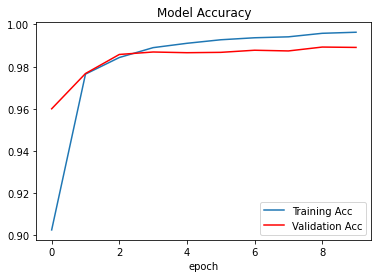

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'], color = 'r')
plt.legend(['Training Acc','Validation Acc'])
plt.title('Model Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

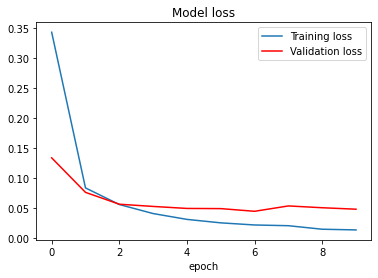

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], color = 'r')
plt.legend(['Training loss','Validation loss'])
plt.title('Model loss')
plt.xlabel('epoch')

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Model Accuracy:', round(score[1]*100,2))

Model Accuracy: 98.78


# Prediction
Below, I have used 3 sample input from the test set to check if the model is able to predict the characters correctly. 

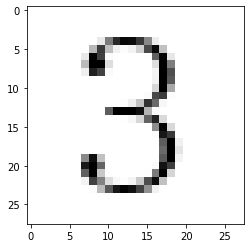

In [25]:
#Predicting a character using the trained model
idx = 2832
plt.imshow(X_test[idx].reshape(28,28),cmap='Greys')

In [26]:
model_prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))
print("Model Prediction: ", model_prediction.argmax())

Model Prediction:  3


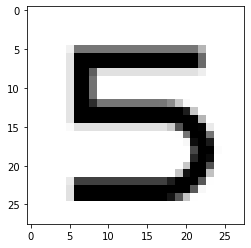

In [27]:
idx = 1309
plt.imshow(X_test[idx].reshape(28,28),cmap='Greys')

In [28]:
model_prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))
print("Model Prediction: ", model_prediction.argmax())

Model Prediction:  5


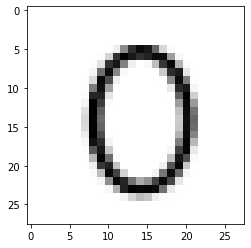

In [29]:
idx = 903
plt.imshow(X_test[idx].reshape(28,28),cmap='Greys')

In [30]:
model_prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))
print("Model Prediction: ", model_prediction.argmax())

Model Prediction:  0


# Conclusion

I have implemented a simple neural network to predict the characters in the TMNIST dataset. The model performs very well with an accuracy of 98% and it is able to accurately predict the characters for all three sample inputs.

# References



1. https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
2. https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392
3. https://www.kaggle.com/code/huchunjun/99-1-tmnist-typefacemnist-chunjunhu
4. https://medium.com/@afozbek_/how-to-train-a-model-with-mnist-dataset-d79f8123ba84
5. https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529
6. https://towardsdatascience.com/beginners-guide-to-understanding-convolutional-neural-networks-ae9ed58bb17d
7. https://medium.datadriveninvestor.com/introduction-to-how-cnns-work-77e0e4cde99b
8. https://keras.io/api/layers/core_layers/




MIT License

Copyright (c) 2022 Aniket Mirajkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.